# Trabajo práctico 1
Arelis Picado

Diego Solís

Isaac Vargas

## 1. Sistemas lineales

### 1.1 Demostracion de linealidad

Demuestre que los siguientes sistemas $L{·}$ (con entrada $u(t)$ y salida $g(t)$, y $h(t)$ una función cualquiera) son lineales o no lineales. Además, muestrelo con una implementación en Pytorch, usando como entrada un arreglo de 50 valores generados al azar. Si va a demostrar por contraejemplo, muestre las entradas y salidas de la corrida en Pytorch que demuestran el no cumplimiento de la propiedad.

1. $g(t) = u(t) + 3$
2. $g(t) = u(t) h(t)$
3. $g(t) = max(u(t))$
4. $g(t) = |u(t)|$

In [34]:
import numpy as np
from matplotlib import use
use('TkAgg') 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp

In [17]:
# 1.1.1 g(t) = u(t) + 3
import torch

is_additive_satisfied1 = False
is_homogeneity_satisfied1 = False

def verify_additivity1(d = 50):
    global is_additive_satisfied1

    x = torch.rand(d)
    v = torch.rand(d)
    left_side = (x + v + 3)
    right_side = (x + 3 + v + 3)
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_additive_satisfied1 = torch.all(torch.isclose(left_side, right_side, atol=1e-05))
    print("is_additive_satisfied: ", is_additive_satisfied1)

def verify_homogeneity1(d = 50):
    global is_homogeneity_satisfied1

    x = torch.rand(d)
    alpha = torch.rand(1)
    left_side = ((alpha * x) + 3) 
    right_side = (torch.abs(alpha) * (x + 3))
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_homogeneity_satisfied1 = torch.all(torch.isclose(left_side, right_side, atol=1e-05))
    print("is_homogeneity_satisfied: ", is_homogeneity_satisfied1)

verify_additivity1()
verify_homogeneity1()

if is_additive_satisfied1 and is_homogeneity_satisfied1:
    print("The system is linear")
else: 
    print("The system is not linear")

left_side:  tensor([4.3346, 4.8570, 4.1888, 4.2001, 3.5262, 3.8391, 3.8597, 3.9857, 3.1798,
        4.1643, 4.1015, 3.7009, 3.2908, 4.2664, 3.6883, 3.2485, 3.6997, 4.5149,
        4.6706, 3.3140, 3.8821, 4.6598, 3.3305, 3.9985, 3.6893, 4.4064, 4.0542,
        3.5993, 4.1204, 3.9893, 4.0644, 3.5485, 3.3487, 4.5775, 4.2125, 3.9416,
        4.4910, 3.6268, 4.5815, 3.8517, 3.8144, 3.7916, 4.4156, 3.2898, 4.1635,
        4.4232, 3.7774, 3.2751, 4.9189, 4.2464])
right_side:  tensor([7.3346, 7.8570, 7.1888, 7.2001, 6.5262, 6.8391, 6.8597, 6.9857, 6.1798,
        7.1643, 7.1015, 6.7009, 6.2908, 7.2664, 6.6883, 6.2485, 6.6997, 7.5149,
        7.6706, 6.3140, 6.8821, 7.6598, 6.3305, 6.9985, 6.6893, 7.4064, 7.0542,
        6.5993, 7.1204, 6.9893, 7.0644, 6.5485, 6.3487, 7.5775, 7.2125, 6.9416,
        7.4910, 6.6268, 7.5815, 6.8517, 6.8144, 6.7916, 7.4156, 6.2898, 7.1635,
        7.4232, 6.7774, 6.2751, 7.9189, 7.2464])
is_additive_satisfied:  tensor(False)
left_side:  tensor([3.1228, 3.0678, 3.1

In [18]:
# 1.1.2 g(t) = u(t)*h(t)

is_additive_satisfied2 = False
is_homogeneity_satisfied2 = False

def verify_additivity2(d = 50):
    global is_additive_satisfied2
    x = torch.rand(d)
    v = torch.rand(d)
    h = torch.rand(d)

    left_side = (x+v)*h
    right_side = (x*h)+(v*h)
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_additive_satisfied2 = torch.all(torch.isclose(left_side, right_side))
    print("is_additive_satisfied: ", is_additive_satisfied2)

def verify_homogeneity2(d = 50):
    global is_homogeneity_satisfied2
    x = torch.rand(d)
    h = torch.rand(d)
    alpha = torch.rand(1)
    left_side = ((torch.abs(alpha) * x) * h) 
    right_side = (alpha * (x * h))
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_homogeneity_satisfied2 = torch.all(torch.isclose(left_side, right_side))
    print("is_homogeneity_satisfied: ", is_homogeneity_satisfied2)

verify_additivity2()
verify_homogeneity2()

if is_additive_satisfied2 and is_homogeneity_satisfied2:
    print("The system is linear")
else: 
    print("The system is not linear")

left_side:  tensor([0.3314, 0.9166, 1.0132, 0.4818, 1.0656, 0.9587, 0.1174, 0.0578, 0.9873,
        0.0543, 1.0593, 0.7612, 0.0841, 0.0255, 0.2347, 0.0324, 0.5594, 0.0126,
        0.0753, 0.1478, 0.7988, 0.1767, 0.4869, 0.7005, 0.1291, 0.1316, 0.2845,
        0.0091, 0.6160, 0.1770, 0.6812, 0.3060, 0.2216, 0.6546, 0.1479, 0.6626,
        1.3782, 0.2099, 0.7387, 0.0046, 0.7172, 0.9032, 0.2489, 0.0186, 0.2234,
        0.2203, 0.6729, 0.1806, 0.0896, 0.8205])
right_side:  tensor([0.3314, 0.9166, 1.0132, 0.4818, 1.0656, 0.9587, 0.1174, 0.0578, 0.9873,
        0.0543, 1.0593, 0.7612, 0.0841, 0.0255, 0.2347, 0.0324, 0.5594, 0.0126,
        0.0753, 0.1478, 0.7988, 0.1767, 0.4869, 0.7005, 0.1291, 0.1316, 0.2845,
        0.0091, 0.6160, 0.1770, 0.6812, 0.3060, 0.2216, 0.6546, 0.1479, 0.6626,
        1.3782, 0.2099, 0.7387, 0.0046, 0.7172, 0.9032, 0.2489, 0.0186, 0.2234,
        0.2203, 0.6729, 0.1806, 0.0896, 0.8205])
is_additive_satisfied:  tensor(True)
left_side:  tensor([0.0703, 0.0148, 0.05

In [19]:
# 1.1.3 g(t) = max(u(t))

is_additive_satisfied3 = False
is_homogeneity_satisfied3 = False

def verify_additivity3(d = 50):
    global is_additive_satisfied3
    x = torch.rand(d)
    v = torch.rand(d)

    left_side = torch.abs(x+v)
    right_side = torch.abs(x) + torch.abs(v)
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_additive_satisfied3 = torch.all(torch.isclose(left_side, right_side))
    print("is_additive_satisfied: ", is_additive_satisfied3)

def verify_homogeneity3(d = 50):
    global is_homogeneity_satisfied3
    x = torch.rand(d)
    alpha = torch.rand(1)
    left_side = (torch.abs(alpha) * torch.abs(x)) 
    right_side = torch.abs(alpha * x)
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_homogeneity_satisfied3 = torch.all(torch.isclose(left_side, right_side))
    print("is_homogeneity_satisfied: ", is_homogeneity_satisfied3)

verify_additivity3()
verify_homogeneity3()

if is_additive_satisfied3 and is_homogeneity_satisfied3:
    print("The system is linear")
else: 
    print("The system is not linear")

left_side:  tensor([1.4107, 0.9249, 0.9589, 1.4681, 0.5496, 0.6772, 1.4124, 0.6822, 1.0597,
        0.6183, 1.4521, 0.9072, 1.1975, 0.6859, 1.2239, 1.1539, 1.2789, 1.5454,
        1.3597, 0.4923, 1.8357, 0.2900, 1.1981, 1.0149, 1.4584, 1.5670, 1.1229,
        0.1233, 0.5538, 1.3948, 0.3173, 1.1622, 1.0076, 1.8194, 0.7188, 0.8649,
        1.5108, 1.4832, 0.9406, 0.8775, 0.6073, 0.9642, 1.5317, 1.5892, 1.3064,
        1.7785, 1.0348, 1.3893, 0.2091, 0.2474])
right_side:  tensor([1.4107, 0.9249, 0.9589, 1.4681, 0.5496, 0.6772, 1.4124, 0.6822, 1.0597,
        0.6183, 1.4521, 0.9072, 1.1975, 0.6859, 1.2239, 1.1539, 1.2789, 1.5454,
        1.3597, 0.4923, 1.8357, 0.2900, 1.1981, 1.0149, 1.4584, 1.5670, 1.1229,
        0.1233, 0.5538, 1.3948, 0.3173, 1.1622, 1.0076, 1.8194, 0.7188, 0.8649,
        1.5108, 1.4832, 0.9406, 0.8775, 0.6073, 0.9642, 1.5317, 1.5892, 1.3064,
        1.7785, 1.0348, 1.3893, 0.2091, 0.2474])
is_additive_satisfied:  tensor(True)
left_side:  tensor([0.5880, 0.2982, 0.37

In [20]:
# 1.1.4 g(t) = |u(t)|

is_additive_satisfied4 = False
is_homogeneity_satisfied4 = False

def verify_additivity4(d = 50):
    global is_additive_satisfied4
    x = torch.rand(d)
    v = torch.rand(d)

    left_side = torch.max(x+v)
    right_side = torch.max(x) + torch.max(v)
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_additive_satisfied4 = torch.all(torch.isclose(left_side, right_side))
    print("is_additive_satisfied: ", is_additive_satisfied4)

def verify_homogeneity4(d = 50):
    global is_homogeneity_satisfied4
    x = torch.rand(d)
    alpha = torch.rand(1)
    left_side = (torch.abs(alpha) * torch.max(x)) 
    right_side = torch.max(alpha * x)
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_homogeneity_satisfied4 = torch.all(torch.isclose(left_side, right_side))
    print("is_homogeneity_satisfied: ", is_homogeneity_satisfied4)

verify_additivity4()
verify_homogeneity4()

if is_additive_satisfied4 and is_homogeneity_satisfied4:
    print("The system is linear")
else: 
    print("The system is not linear")

left_side:  tensor(1.8401)
right_side:  tensor(1.9410)
is_additive_satisfied:  tensor(False)
left_side:  tensor([0.2171])
right_side:  tensor(0.2171)
is_homogeneity_satisfied:  tensor(True)
The system is not linear


### 1.2 Pruebas de homogeneidad absoluta y superposición

Demuestre si los siguientes sistemas con múltiples variables de entrada $L{·}$ con entrada vectorial $\vec{u}$ y salida escalar $s \in \mathbb{R}$, cumplen la condición de homogeneidad absoluta ($L{rx} = |r|*L{x}$) y superposición.
Además, muéstrelo con una implementación en Pytorch, mostrando la propiedad con 50 vectores generados al azar.
Si realiza la demostración por contraejemplo, muestre las entradas y salidas de la corrida en Pytorch que demuestran el no cumplimiento de la propiedad.
1. Norma de Manhattan $l_1$
1. Norma Euclidiana $l_2$
1. Norma $l_{\infty}$

In [21]:
# 1.2.1 Norma Manhattan (L1)

import torch

is_superpos_satisfied1 = False
is_abshomo_satisfied1 = False

def verify_superpos1(d = 50):
    global is_superpos_satisfied1
    x = torch.rand(d)
    v = torch.rand(d)

    left_side = torch.norm(x+v, p=1)
    right_side = torch.norm(x, p=1) + torch.norm(v, p=1)
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_superpos_satisfied1 = torch.all(torch.le(left_side, right_side))
    print("is_superposition_satisfied: ", is_superpos_satisfied1)

def verify_abshomo1(d = 50):
    global is_abshomo_satisfied1
    x = torch.rand(d)
    alpha = torch.rand(1)
    left_side = torch.norm(alpha * x, p=1) 
    right_side = torch.abs(alpha) * torch.norm(x, p=1)
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_abshomo_satisfied1 = torch.all(torch.isclose(left_side, right_side))
    print("is_homogeneity_satisfied: ", is_abshomo_satisfied1)

verify_superpos1()
verify_abshomo1()



left_side:  tensor(54.3022)
right_side:  tensor(54.3022)
is_superposition_satisfied:  tensor(False)
left_side:  tensor(8.4552)
right_side:  tensor([8.4552])
is_homogeneity_satisfied:  tensor(True)


In [30]:
# Definición de vectores específicos para el contraejemplo
x = torch.tensor([1.0, -1.0])  # Ejemplo de vector
v = torch.tensor([1.0, 1.0])    # Otro vector

# Cálculo de la norma L1
left_side = torch.norm(x + v, p=1)
right_side = torch.norm(x, p=1) + torch.norm(v, p=1)

print("Vector x:", x)
print("Vector v:", v)
print("left_side (||x + v||_1): ", left_side)
print("right_side (||x||_1 + ||v||_1): ", right_side)

# Verificación de la desigualdad
is_superpos_satisfied = left_side == right_side
print("is_superposition_satisfied: ", is_superpos_satisfied)

Vector x: tensor([ 1., -1.])
Vector v: tensor([1., 1.])
left_side (||x + v||_1):  tensor(2.)
right_side (||x||_1 + ||v||_1):  tensor(4.)
is_superposition_satisfied:  tensor(False)


In [23]:
# 1.2.2 Norma Euclidiana (L2)

import torch

is_superpos_satisfied2 = False
is_abshomo_satisfied2 = False

def verify_superpos2(d = 50):
    global is_superpos_satisfied2
    x = torch.rand(d)
    v = torch.rand(d)

    left_side = torch.norm(x + v, p=2)
    right_side = torch.norm(x, p=2) + torch.norm(v, p=2)
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_superpos_satisfied2 = torch.all(torch.le(left_side, right_side))
    print("is_superposition_satisfied: ", is_superpos_satisfied2)

def verify_abshomo2(d = 50):
    global is_abshomo_satisfied2
    x = torch.rand(d)
    alpha = torch.rand(1)
    left_side = torch.norm(alpha * x, p=2)
    right_side = torch.abs(alpha) * torch.norm(x, p=2)
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_abshomo_satisfied2 = torch.all(torch.isclose(left_side, right_side))
    print("is_homogeneity_satisfied: ", is_abshomo_satisfied2)

verify_superpos2()
verify_abshomo2()



left_side:  tensor(7.5519)
right_side:  tensor(7.9666)
is_superposition_satisfied:  tensor(True)
left_side:  tensor(2.3319)
right_side:  tensor([2.3319])
is_homogeneity_satisfied:  tensor(True)


In [32]:
x = torch.tensor([3.0, 0.0])
v = torch.tensor([0.0, 4.0])

# Calculamos la norma L2 de la suma y la suma de las normas
left_side = torch.norm(x + v, p=2)  # Norma de la suma
right_side = torch.norm(x, p=2) + torch.norm(v, p=2)  # Suma de las normas

print("Vector x:", x)
print("Vector v:", v)
print("left_side (||x + v||_2): ", left_side)
print("right_side (||x||_2 + ||v||_2): ", right_side)
print("left_side == right_side:", left_side == right_side)

Vector x: tensor([3., 0.])
Vector v: tensor([0., 4.])
left_side (||x + v||_2):  tensor(5.)
right_side (||x||_2 + ||v||_2):  tensor(7.)
left_side == right_side: tensor(False)


In [24]:
# 1.2.2 Norma L_infinity

import torch

is_superpos_satisfied3 = False
is_abshomo_satisfied3 = False

def verify_superpos3(d = 50):
    global is_superpos_satisfied3
    x = torch.rand(d)
    v = torch.rand(d)

    left_side = torch.norm(x + v, p=float('inf'))
    right_side = torch.norm(x, p=float('inf')) + torch.norm(v, p=float('inf'))
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_superpos_satisfied3 = torch.all(torch.le(left_side, right_side))
    print("is_superposition_satisfied: ", is_superpos_satisfied3)

def verify_abshomo3(d = 50):
    global is_abshomo_satisfied3
    x = torch.rand(d)
    alpha = torch.rand(1)
    left_side = torch.norm(alpha * x, p=float('inf'))
    right_side = torch.abs(alpha) * torch.norm(x, p=float('inf'))
    print("left_side: ", left_side)
    print("right_side: ", right_side)
    is_abshomo_satisfied3 = torch.all(torch.isclose(left_side, right_side))
    print("is_homogeneity_satisfied: ", is_abshomo_satisfied3)

verify_superpos3()
verify_abshomo3()


left_side:  tensor(1.8223)
right_side:  tensor(1.9763)
is_superposition_satisfied:  tensor(True)
left_side:  tensor(0.2971)
right_side:  tensor([0.2971])
is_homogeneity_satisfied:  tensor(True)


In [33]:
# Definimos vectores con componentes específicos para mostrar la propiedad
x = torch.tensor([3.0, 2.0, -1.0])
v = torch.tensor([-1.0, -2.0, 0.5])

# Calculamos la norma L_infinity y la suma de las normas L_infinity de cada vector
left_side = torch.norm(x + v, p=float('inf'))  # Norma máxima de la suma
right_side = torch.norm(x, p=float('inf')) + torch.norm(v, p=float('inf'))  # Suma de las normas máximas

print("Vector x:", x)
print("Vector v:", v)
print("left_side (||x + v||_∞): ", left_side)
print("right_side (||x||_∞ + ||v||_∞): ", right_side)
print("left_side == right_side:", left_side == right_side)

Vector x: tensor([ 3.,  2., -1.])
Vector v: tensor([-1.0000, -2.0000,  0.5000])
left_side (||x + v||_∞):  tensor(2.)
right_side (||x||_∞ + ||v||_∞):  tensor(5.)
left_side == right_side: tensor(False)


## 2 Vectores
### 2.1 Graficación y propiedades de los vectores
#### 2.1.1 Usando Python grafique los siguientes vectores
$\vec{v}_1$ = $\begin{bmatrix}
-0.3 \\
0.4 \\
0.1
\end{bmatrix}$

$\vec{v}_2$ = $\begin{bmatrix}
0.5 \\
0.2 \\
0.1
\end{bmatrix}$

$\vec{v}_3$ = $\begin{bmatrix}
\frac{1}{\sqrt{2}} \\
\frac{-1}{\sqrt{2}} \\
0
\end{bmatrix}$

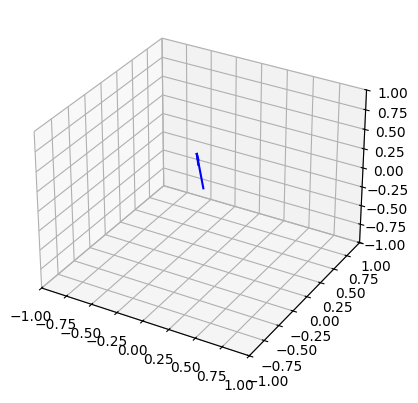

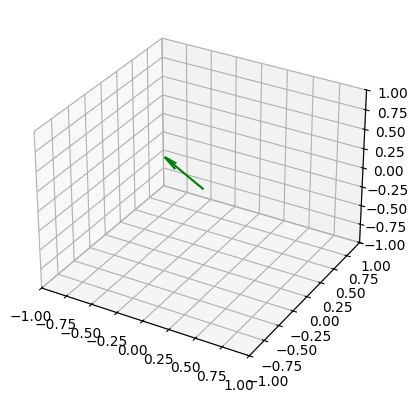

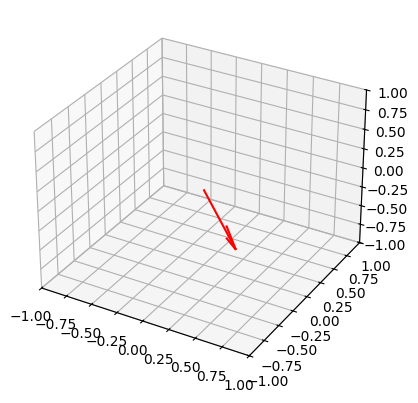

In [25]:
# Se importa la libreria de matplotlib y numpy
import matplotlib.pyplot as plt
import numpy as np

# Grafica de v1
v1 = np.array([-0.3, 0.4, 0.1])

# Se crea el eje 3D    
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')

# Graficar el vector en el eje 3D
ax1.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='blue', length=1)

# Configurar los limites de los ejes
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1, 1])
ax1.set_zlim([-1, 1])

# Mostrar la grafica
plt.show()

# Grafica de v2
v2 = np.array([-0.5, 0.2, 0.1])

# Se crea el eje 3D    
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

# Graficar el vector en el eje 3D
ax2.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='green', length=1)

# Configurar los limites de los ejes
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])
ax2.set_zlim([-1, 1])

# Mostrar la grafica
plt.show()

# Definir el vector v3
v3 = np.array([1/np.sqrt(2), -1/np.sqrt(2), 0])

# Se crea el eje 3D    
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')

# Graficar el vector en el eje 3D
ax3.quiver(0, 0, 0, v3[0], v3[1], v3[2], color='red', length=1)

# Configurar los limites de los ejes
ax3.set_xlim([-1, 1])
ax3.set_ylim([-1, 1])
ax3.set_zlim([-1, 1])

# Mostrar la grafica
plt.show()
                


### 2.2 Propiedades del producto punto
Demuestre lo siguiente. Además, muéstrelo con una implementación en Pytorch, usando como entrada un arreglo de 50 arreglos generados al azar, adjunte un pantallazo con la salida de la comparación del resultado a ambos lados de la igualdad, o en su defecto, demuestre el no cumplimiento de la propiedad con un contraejemplo.

#### 2.2.1 $\vec{u} \cdot (r\vec{v}+\vec{w}) = r (\vec{u} \cdot \vec{v}) + (\vec{u} \cdot \vec{v})$

In [26]:
import torch

# Generar 50 arreglos aleatorios de tamaño 3
u = torch.randn(50, 3)
v = torch.randn(50, 3)
w = torch.randn(50, 3)
r = torch.randn(1).item()

# Propiedad 1: u · (r*v + w) = r * (u · v) + (u · w)
lhs_1 = torch.sum(u * (r * v + w), dim=1)
rhs_1 = r * torch.sum(u * v, dim=1) + torch.sum(u * w, dim=1)

# Verificar si la propiedad 1 se cumple
propiedad_1_cumple = torch.allclose(lhs_1, rhs_1)

print(f"Propiedad 1 se cumple: {propiedad_1_cumple}")

# Mostrar los resultados de ambos lados de las igualdades
print("Lado izquierdo de la propiedad 1:", lhs_1)
print("Lado derecho de la propiedad 1:", rhs_1)

Propiedad 1 se cumple: True
Lado izquierdo de la propiedad 1: tensor([-0.6449,  2.0158, -3.3764, -1.7778,  1.1356, -1.5301,  3.3985, -3.5788,
        -4.0111,  1.4638, -1.7002, -3.6548, -2.5058,  2.1898, -0.1548,  0.0835,
        -5.0022, -4.5033,  7.6946, -0.1526,  0.3804,  2.7005, -2.0142, -1.1138,
         2.5398,  1.2109, -0.7561,  3.4650, -0.4785, -0.5093, -2.0312,  0.4070,
        -0.3804,  1.4703,  1.6381,  2.4317,  3.1347,  1.6096, -0.7837,  0.2260,
        -6.5606,  3.2125,  0.7657, -1.2016,  1.7280, -2.8195,  3.9979,  5.8725,
         5.1716, -0.0603])
Lado derecho de la propiedad 1: tensor([-0.6449,  2.0158, -3.3764, -1.7778,  1.1356, -1.5301,  3.3985, -3.5788,
        -4.0111,  1.4638, -1.7002, -3.6548, -2.5058,  2.1898, -0.1548,  0.0835,
        -5.0022, -4.5033,  7.6946, -0.1526,  0.3804,  2.7005, -2.0142, -1.1138,
         2.5398,  1.2109, -0.7561,  3.4650, -0.4785, -0.5093, -2.0312,  0.4070,
        -0.3804,  1.4703,  1.6381,  2.4317,  3.1347,  1.6096, -0.7837,  0.2260,

#### 2.2.2 No asociatividad del producto punto $\vec{u} \cdot (\vec{v} \cdot \vec{w}) \not = (\vec{u} \cdot \vec{v}) \cdot \vec{w}$

In [27]:
import torch

# Propiedad 2: No asociatividad del producto punto u · (v · w) != (u · v) · w
lhs_2 = torch.sum(u * torch.sum(v * w, dim=1).unsqueeze(1), dim=1)
rhs_2 = torch.sum(torch.sum(u * v, dim=1).unsqueeze(1) * w, dim=1)

# Verificar si la propiedad 2 se cumple
propiedad_2_cumple = not torch.allclose(lhs_2, rhs_2)

print(f"Propiedad 2 se cumple: {propiedad_2_cumple}")

print("Lado izquierdo de la propiedad 2:", lhs_2)
print("Lado derecho de la propiedad 2:", rhs_2)

Propiedad 2 se cumple: True
Lado izquierdo de la propiedad 2: tensor([-0.1368, -1.0113,  2.4852,  0.0283, -0.1263,  2.0909,  1.2540,  0.9953,
        -2.0961, -0.4063,  4.0812, -4.9713,  2.5648,  3.3156,  9.5980, -4.8492,
         4.2616,  7.5544,  2.1724, -1.7248, -0.2706,  0.3315,  2.1813,  2.2599,
        -0.1645, -0.0211, -1.4458, -2.2019,  0.0512,  0.8933,  0.0517, -1.0939,
         0.6446, -0.1405, -0.1149, -5.2007,  0.1226,  5.1457, -1.4528,  0.1863,
        -0.6042, -4.0662,  4.4561,  1.0200, -0.8447,  1.7238, -0.4404, -2.7572,
        -0.9720, -0.8471])
Lado derecho de la propiedad 2: tensor([-1.1074e-01, -9.2425e-01,  1.1398e+00, -1.2870e+00,  1.2687e+00,
        -7.9681e-01,  1.6587e+00,  5.8726e-01, -2.5167e+00,  1.1212e-02,
        -3.0998e+00,  7.6909e-01,  3.9774e+00, -1.9206e+00, -1.9711e+00,
        -7.7328e-01,  7.9270e+00,  1.7086e+01,  2.2475e+00,  1.3145e-01,
        -3.0068e-02, -1.6227e-01, -3.2739e-01,  6.3461e-01,  1.7742e+00,
        -7.2358e-01,  3.4406e-01, 

## 3. Funciones multivariable
### 3.1 Funciones lineales multivariable
Un hiperplano definido en un espacio $\mathbb{R^{n+1}}$ se puede expresar como una función con dominio $\vec{x} \in \mathbb{R^{n}}$ y codominio en $\mathbb{R}$ como sigue: $z = f(\vec{x}) = \vec{x} \cdot \vec{w}$, con $\vec{w} \in \mathbb{R^{n}}$ el arreglo de coeficientes de tal funcional. 

#### 3.1.1
Tómese $\vec{w_1}$ = $\begin{bmatrix}
0.5 \\
0.2
\end{bmatrix} $ para la función $f_1$ y $\vec{w_2}$ = $\begin{bmatrix}
-0.1 \\
0.05 
\end{bmatrix}$ para la función $f_2$, (funciones con dominio en $\mathbb{R^{2}}$ y codominio en ). Grafique ambos planos en Pytorch.

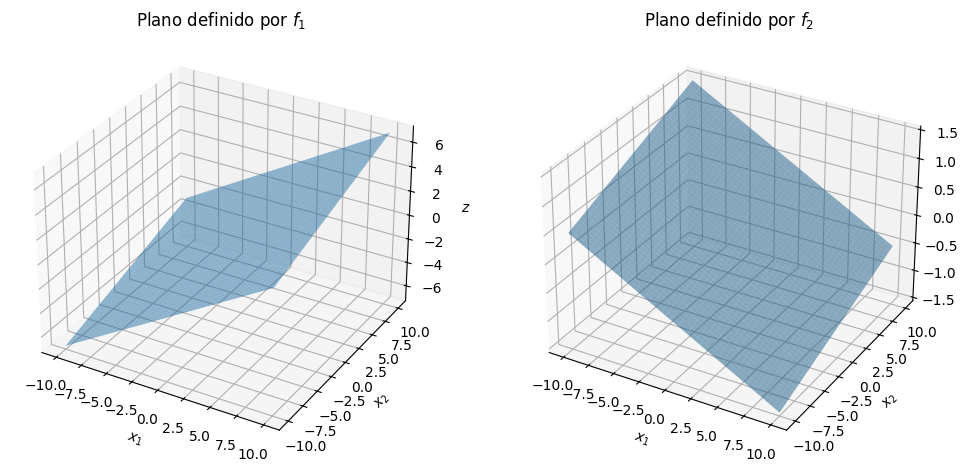

In [28]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Definir los vectores w1 y w2
w1 = torch.tensor([0.5, 0.2])
w2 = torch.tensor([-0.1, 0.05])

# Definir la función f
def f(x, w):
    return torch.dot(x, w)

# Crear una malla de puntos en el dominio
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calcular los valores de z para cada punto en la malla
Z1 = X1 * w1[0].item() + X2 * w1[1].item()
Z2 = X1 * w2[0].item() + X2 * w2[1].item()

# Graficar los planos
fig = plt.figure(figsize=(12, 6))

# Plano 1
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1, X2, Z1, alpha=0.5)
ax1.set_title('Plano definido por $f_1$')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$z$')

# Plano 2
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X1, X2, Z2, alpha=0.5)
ax2.set_title('Plano definido por $f_2$')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('$z$')

plt.show()


#### 3.1.2
Para cada plano, grafique el vector normal en el punto $P$ = $(1,1)$ y una curva de nivel perpendicular a tal vector normal.

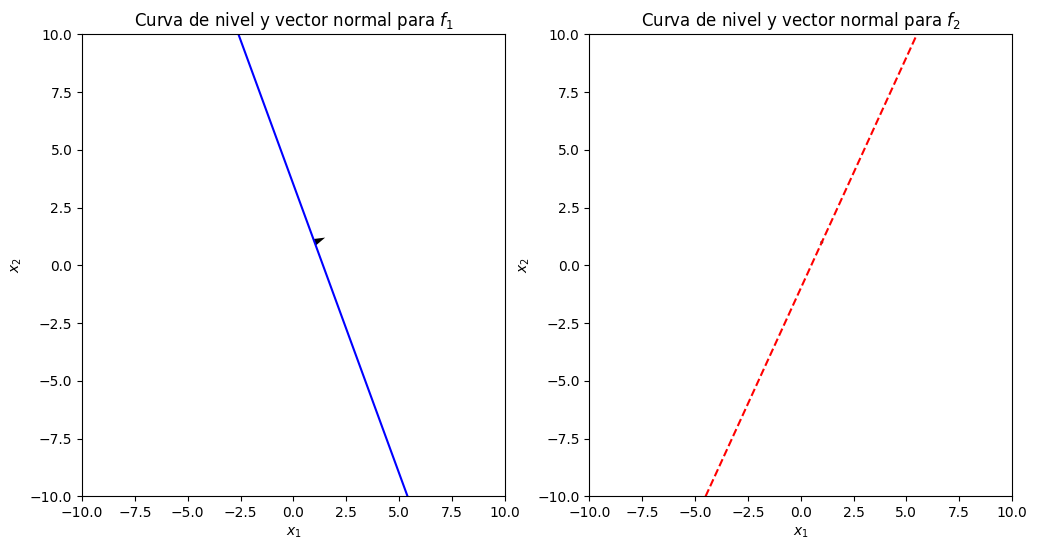

In [29]:
# Punto P
P = torch.tensor([1.0, 1.0])

# Calcular los valores de z en el punto P para ambos planos
z_P1 = f(P, w1)
z_P2 = f(P, w2)

# Graficar el vector normal y la curva de nivel para el plano 1
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plano 1
ax[0].contour(X1, X2, Z1, levels=[z_P1.item()], colors='blue')
ax[0].quiver(P[0], P[1], w1[0], w1[1], angles='xy', scale_units='xy', scale=1)
ax[0].set_title('Curva de nivel y vector normal para $f_1$')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')

# Plano 2
ax[1].contour(X1, X2, Z2, levels=[z_P2.item()], colors='red')
ax[1].quiver(P[0], P[1], w2[0], w2[1], angles='xy', scale_units='xy', scale=1)
ax[1].set_title('Curva de nivel y vector normal para $f_2$')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')

plt.show()

#### 3.2 El vector gradiente:
 Para cada una de las siguientes funciones multivariable: (1) grafique su superficie con dominio entre -10 y 10 (2) calcule el vector gradiente manualmente, evalúelo y grafique el vector unitario en la dirección del gradiente para los dos puntos especificados (en la misma figura de la superficie) y (3), calcule la magnitud de tal vector gradiente en cada punto (4). Calcule lo que se conoce como la matriz Hessiana.

In [35]:
def plot_surface(func, x_domain, y_domain):
    x, y = sp.symbols('x y')
    func_lambda = sp.lambdify((x, y), func, modules=['numpy'])
    
    x_vals = np.linspace(x_domain[0], x_domain[1], 100)
    y_vals = np.linspace(y_domain[0], y_domain[1], 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = func_lambda(X, Y)
    
    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    
    # ax.set_title(f'Surface plot of the function: {sp.pretty(func)}')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    
    plt.show(block=True)

def plot_surface_with_gradients(func, x_domain, y_domain, points):
    x, y = sp.symbols('x y')
    func_lambda = sp.lambdify((x, y), func, modules=['numpy'])
    
    x_vals = np.linspace(x_domain[0], x_domain[1], 100)
    y_vals = np.linspace(y_domain[0], y_domain[1], 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = func_lambda(X, Y)
    
    gradient = compute_gradient(func, [x, y])
    print(gradient)

    gradients_at_points = evaluate_gradient_at_points(gradient, points)
    print(gradients_at_points)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

    for i, point in enumerate(points):
        grad = gradients_at_points[i]
        norm = np.linalg.norm(grad)
        unit_vector = grad / norm if norm != 0 else grad

        ax.quiver(point[0], point[1], float(func_lambda(point[0], point[1])),
                  unit_vector[0], unit_vector[1], 0,
                  color='r', length=1, normalize=True)

    # ax.set_title(f'Surface plot of the function with Gradient Vectors')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    
    plt.show(block=True)

def compute_gradient(func, variables):
    gradient = [sp.diff(func, var) for var in variables]
    
    return gradient

def evaluate_gradient_at_points(gradient, points):
    x, y = sp.symbols('x y')
    evaluated_gradients = []
    for point in points:
        grad_at_point = np.array([float(grad.evalf(subs={x: point[0], y: point[1]})) for grad in gradient])
        evaluated_gradients.append(grad_at_point)
    return evaluated_gradients

a. $f(x,y) = x^3 y^2 + 1$, evaluación del gradiente en los puntos $P_0 = (0,0)$ y $P_1 = (7.4,-6.3)$

In [36]:
x, y = sp.symbols('x y')

func1 = x**3 * y**2 + 1
points_func1 = [(0, 0), (7.4, -6.3)]
plot_surface_with_gradients(func1, (-10, 10), (-10, 10), points_func1)


[3*x**2*y**2, 2*x**3*y]
[array([0., 0.]), array([ 6520.2732, -5105.8224])]


b. $f(x,y) = \sin(x^2) + x\cos(y^3)$, evaluación del gradiente en los puntos $P_0 = (1.5,-5.5)$ y $P_1 = (-10,-10)$

In [37]:
func2 = sp.sin(x**2) + x * sp.cos(y**3)
points_func2 = [(1.5, -5.5), (-10, -10)]
plot_surface_with_gradients(func2, (-10, 10), (-10, 10), points_func2)

[2*x*cos(x**2) + cos(y**3), -3*x*y**2*sin(y**3)]
[array([-2.87615899, 17.56689497]), array([  -16.68399837, -2480.6386216 ])]


c. $f(x,y) = 3^{2x} + 5^{4y} + 2x + y^4$, evaluación del gradiente en los puntos $P_0 = (-4,-2)$ y $P_1 = (-2,9)$

In [38]:
func3 = 3**(2*x) + 5**(4*y) + 2*x + y**4
points_func3 = [(-4, -2), (-2, 9)]
plot_surface_with_gradients(func3, (-10, 10), (-10, 10), points_func3)

[2*3**(2*x)*log(3) + 2, 4*5**(4*y)*log(5) + 4*y**3]
[array([  2.00033489, -31.99998352]), array([2.02712623e+00, 9.36816163e+25])]
